In [1]:
# Pràctica 6 secció 4a

# Problema Predador-Presa

# Imaginem un nínxol ecològic on conviuen dues espècies, una depredadora i una presa, sense altres interferències
# significatives. Anem a muntar un model que descrigui l'evolució de les dues espècies.

# Diem x(t) a la quantitat d'elements de la presa i y(t) a la quantitat de depredadors.
# El primer que hem de notar en aquest model és que les quantitats x(t) i y(t) haurien de ser enteres, però això
# complicaria molt el model. Per tant, si les prenem continues, sortiran nombres decimals, que només son acceptables
# si pensen que les unitats de treball per contar presses i predadors son grans (de milers, o de milions) i per
# tant els decimals principals afecten a unitats enteres, i només els decimals menys significatius son els que
# afectarien a "trossets" de animalons.
# Un altra detall d'aquest model és que només te sentit pràctic quan x>=0 i y>=0.

# Per muntar el model fem-ho pas a pas per entendre l'efecte de cada terme de l'equació que afegim.

# Suposem que només hi haguessin predadors, i ni una sola presa. Posem y(0) unitats en el nínxol, i com que no tenen
# res per menjar, s'han de morir tots. Per tant, és d'esperar un comportament del tipus y'=-a*y amb a>0. És a dir que
# la solució és una exponencial d'exponent negatiu i per tant la solució tendeix a zero.

# Suposem que només hi haguessin preses, i ni un sol predador. Posem x(0) unitats en el nínxol, i com que no tenen
# cap enemic, es poden reproduir i créixer indefinidament. La frase "reproduir-se com a conills" adquireix ple
# significat en aquest model. Si no hi hagués cap limitació, ni de menjar ni d'espai, el model seria simplement
# x'=b*x amb b>0, i tindria un creixement exponencial cap al infinit. Però com que això no és realista, hem de pensar
# que ja sigui per menjar o per espai, ha d'haver-hi un límit en aquest creixement, i que si hi ha una població
# de preses és superior a aquest límit, la població ha de disminuir.
#
# Això s'arregla afegint un terme a aquesta equació com x'=b*x-c*x^2 amb c>0. D'aquesta manera si x(t)<b/c, aleshores
# x'(t)>0 i per tant augmentarà la població, però si x(t)>b/c, aleshores x'(t)<0 i la població disminuirà.
#
# Amb això ja tenim un sistema com
#
# x'=b*x-c*x^2
# y'=-a*y
#
# amb a,b,c>0. Els valors de a,b,c depenen de la tassa de reproducció dels afectats, la quantitat de menjar
# i espai que necessiten i d'altres factors biològics que no son part de la nostra feina com a matemàtics. Ja seran
# els zoòlegs qui ens donin els seus valors.
#
# Ara ens falta un factor que reguli el fet de que algunes preses moriran al ser menjades pels predadors i el fet de
# que això permetrà alimentar-se als predadors i per tant reproduir-se. Ha de ser un element que reguli el fet
# de que si hi han poques presses i pocs depredadors, serà poc probable que es trobin i que per tant "interactúin".
# Si hi ha moltes d'una i poques de l'altra, el grau de "interactuació" serà més alt. I si hi han molts de les dues
# espècies, la "interactuació" ha de ser molt gran. El element matemàtic que millor regula aquesta "interactuació" és
# simplement el producte x*y. Per tant, cal afegir aquest element (amb un factor -d i d>0) a la primera equació per
# modelitzar les presses que son devorades, i un altre a la segona equació (amb un factor e>0) per modelitzar els
# nous predadors que nèixeran gràcies a que els seus pares s'han pogut alimentar correctament. Els valors de "d" i "e"
# no tenen per què coincidir, i depenen de la quantitat de preses devorades cada vegada que un predador troba una
# manada de preses (no cauen el mateix nombre de sardines que el mateix nombre de búfals quan els ataca el seu respectiu)
# predador, ni es reprodueixen de la mateixa manera els tigres o les insectes carnívors, per unitat de proteína
# consumida.

# Per tant, el model final és:
#
# x'=b*x-c*x^2-d*x*y
# y'=-a*y+e*x*y
#
# amb totes les constant positives. Aquest model dona doncs un sistema de dues equacions diferencials autònomes
# de grau 2, doncs les expressions de la dreta son polinomis de grau 2, i no apareix el temps com a variable.
#
# Ja dic que la nostra feina com a matemàtics no és trobar el valor de les constant, però si que ho és trobar
# quines solucions diferents pot tenir un problema d'aquest tipus, i veurem que en pot tenir de tipus
# diferents. A més, també podrem "veure en el futur" i determinar a partir d'unes quantitats inicials de predadors
# i preses, que tindrem al cap d'un cert temps. O també podem mirar en el passat i tractar de deduir que hi havia
# abans.

# Aquest models quadràtics simulen molt be el problema predador-presa. En funció de la complexitat del model, es 
# poden afegir altres termes. 
#
# Per exemple, no tindrà el mateix comportament una presa (o predador) que actiu en solitari o una que actui en manada.
# Això podria comportar l'aparició de termes cúbics o grau superior.
#
# Fins i tot es podrien afegir funcions periòdiques on hi intervingués el temps, però
# aleshores el sistema deixaria de ser autònom. I també es podria fer aparèixer una tercera espècie, amb la
# conseqüència de que el problema deixaria de ser de 2 dimensions i passaria a 3.

# Estudiem doncs un cas concret

In [2]:
var("x y");

In [3]:
eq1=x-2.*x^2-3.*x*y

In [4]:
eq2=3.*x*y-y

In [5]:
sol=solve([eq1,eq2],x,y);sol

[[x == 0, y == 0], [x == (1/2), y == 0], [x == (1/3), y == (1/9)]]

In [6]:
px1=sol[0][0].rhs();px1

0

In [7]:
py1=sol[0][1].rhs();py1

0

In [8]:
px2=sol[1][0].rhs();px2

1/2

In [9]:
py2=sol[1][1].rhs();py2

0

In [10]:
px3=sol[2][0].rhs();px3

1/3

In [11]:
py3=sol[2][1].rhs();py3

1/9

In [12]:
# Aquest sistema només té 3 punts singulars

In [13]:
# Prescindim de les singularitats complexes

In [14]:
qx=max(px1,px2,px3);qx

1/2

In [15]:
qy=max(py1,py2,py3);qy

1/9

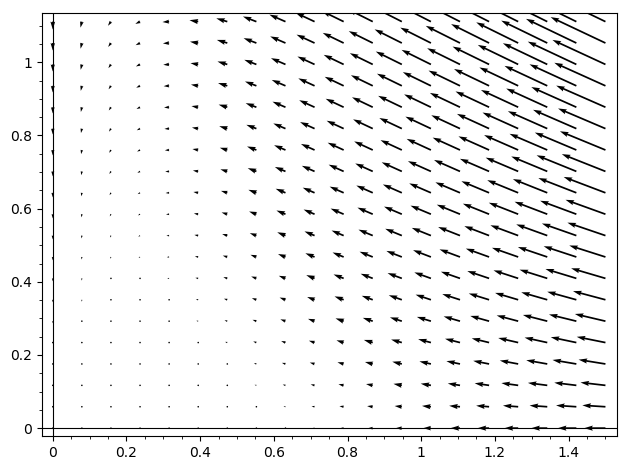

In [16]:
plot=plot_vector_field((eq1,eq2), (x,0,qx+1), (y,0,qy+1));plot

In [17]:
var("t");

In [18]:
# Estudiem primer que és cada punt singular

In [19]:
# El (0,0) és trivialment una sella. Les separatrius son els eixos. Atractora en el sentit vertical
# i repulsora en l'horitzontal.

In [20]:
A=matrix([[diff(eq1,x),diff(eq1,y)],[diff(eq2,x),diff(eq2,y)]]).subs(x=px1,y=py1);A

[ 1  0]
[ 0 -1]

In [21]:
A.eigenvalues()

[-1, 1]

In [22]:
A=matrix([[diff(eq1,x),diff(eq1,y)],[diff(eq2,x),diff(eq2,y)]]).subs(x=px3,y=py3);A

[-0.666666666666667  -1.00000000000000]
[ 0.333333333333333  0.000000000000000]

In [23]:
A.eigenvalues()

[-1/3*I*sqrt(2) - 1/3, 1/3*I*sqrt(2) - 1/3]

In [24]:
# Aquest és un focus atractor

In [25]:
# Anem pel darrer punt singular

In [26]:
A=matrix([[diff(eq1,x),diff(eq1,y)],[diff(eq2,x),diff(eq2,y)]]).subs(x=px2,y=py2);A

[-1.00000000000000 -1.50000000000000]
[                0 0.500000000000000]

In [27]:
A.eigenvalues()

[1/2, -1]

In [28]:
(N(A.eigenvalues()[0]),N(A.eigenvalues()[1]))

(0.500000000000000, -1.00000000000000)

In [29]:
# Es una sella

In [30]:
px=px2;py=py2;h=0.01;step1=0.01;

In [31]:
vec=A.eigenvectors_right();vec

[(1/2, [(1, -1)], 1), (-1, [(1, 0)], 1)]

In [32]:
vec[0][0]

1/2

In [33]:
kt=1;
if(vec[0][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px+h*vec[0][1][0][0],py+h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[0][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px+h*vec[0][1][0][0],py+h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [34]:
sol1=[[j,k] for i,j,k in sol]

In [35]:
if(vec[0][0]<0):
    sep5=list_plot(sol1,color="blue")
elif (vec[0][0]>0):
    sep5=list_plot(sol1,color="red")

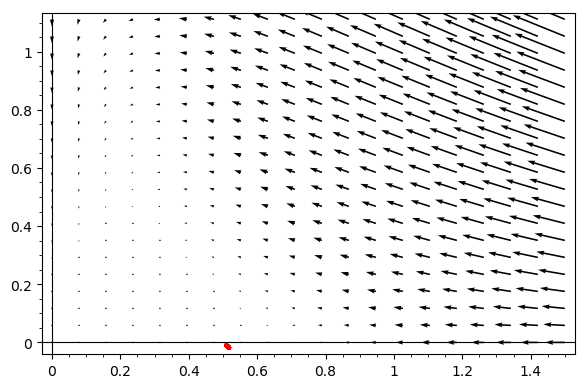

In [36]:
plot+sep5

In [37]:
kt=20;
if(vec[0][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px-h*vec[0][1][0][0],py-h*vec[0][1][0][1]],ivar=t,
                      end_points=[qx+kt,qy+kt],step=step1)
elif (vec[0][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px-h*vec[0][1][0][0],py-h*vec[0][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [38]:
sol1=[[j,k] for i,j,k in sol]

In [39]:
if(vec[0][0]<0):
    sep6=list_plot(sol1,color="blue")
elif (vec[0][0]>0):
    sep6=list_plot(sol1,color="red")

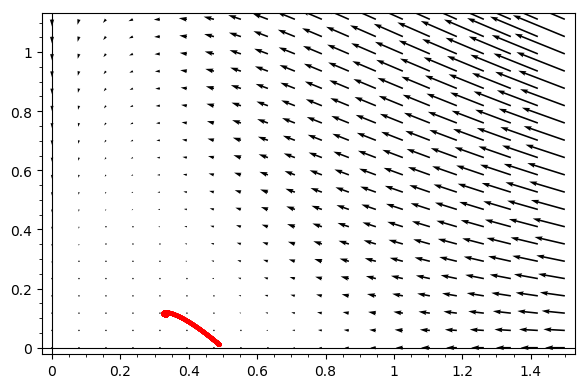

In [40]:
plot+sep6

In [41]:
kt=3.4;
if(vec[1][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px+h*vec[1][1][0][0],py+h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[1][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px+h*vec[1][1][0][0],py+h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [42]:
sol1=[[j,k] for i,j,k in sol]

In [43]:
if(vec[1][0]<0):
    sep7=list_plot(sol1,color="blue")
elif (vec[1][0]>0):
    sep7=list_plot(sol1,color="red")

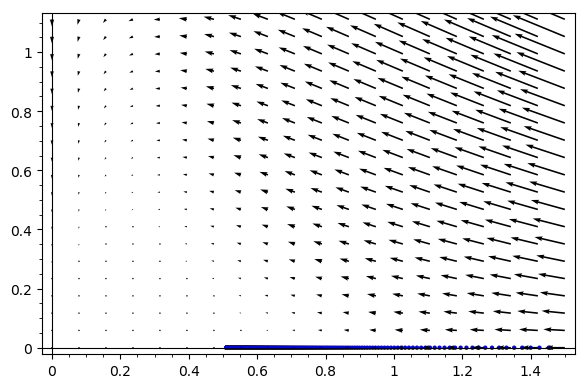

In [44]:
plot+sep7

In [45]:
kt=7.8;
if(vec[1][0]>0):
    sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px-h*vec[1][1][0][0],py-h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)
elif (vec[1][0]<0):
    sol=desolve_system_rk4([-eq1,-eq2],[x,y],ics=[0,px-h*vec[1][1][0][0],py-h*vec[1][1][0][1]],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [46]:
sol1=[[j,k] for i,j,k in sol]

In [47]:
if(vec[1][0]<0):
    sep8=list_plot(sol1,color="blue")
elif (vec[1][0]>0):
    sep8=list_plot(sol1,color="red")

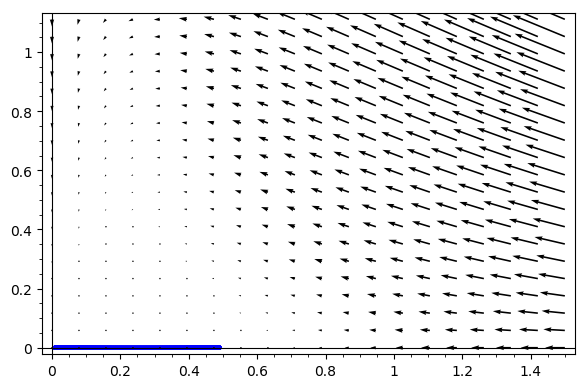

In [48]:
plot+sep8

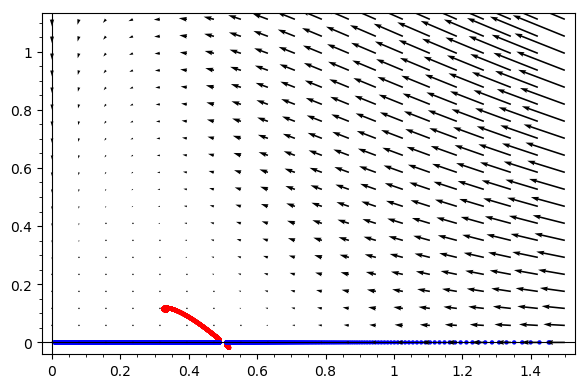

In [49]:
plot+sep5+sep6+sep7+sep8

In [50]:
# Amb el veiem aquí, i sapiguent que no hi ha més punts singulars, 
# ja podem saber que farà qualsevol altra òrbita que passi per un punt concret.

In [51]:
px=1;py=1;kt=10;
sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px,py],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [52]:
sol1=[[j,k] for i,j,k in sol]

In [53]:
orb1=list_plot(sol1,color="yellow")

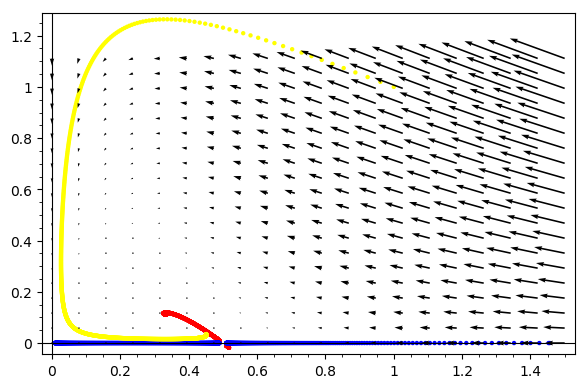

In [56]:
plot+sep5+sep6+sep7+sep8+orb1

In [57]:
px=0.5;py=0.5;kt=10;sol=desolve_system_rk4([eq1, eq2],[x,y],ics=[0,px,py],ivar=t,
                       end_points=[qx+kt,qy+kt],step=step1)

In [58]:
sol1=[[j,k] for i,j,k in sol]

In [59]:
orb2=list_plot(sol1,color="yellow")

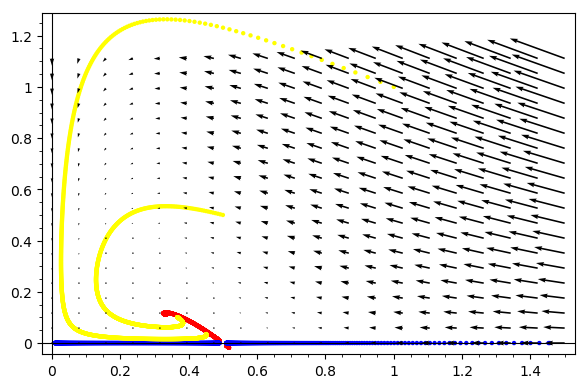

In [60]:
plot+sep5+sep6+sep7+sep8+orb1+orb2